In [28]:
import pandas as pd

# 데이터를 불러옵니다.
df = pd.read_csv('12_02.csv')

# "일시" 열을 datetime 형식으로 변환합니다.
df['일시'] = pd.to_datetime(df['일시'])

# "일시"를 기준으로 데이터를 그룹화하고, 각 그룹에 대해 수온, 염분, 기온, 기압의 평균을 계산합니다.
grouped_df = df.groupby('일시').mean()

# 평균 값을 소수점 2자리까지 반올림하여 보여줍니다.
grouped_df = grouped_df.round(2)

# 결과를 CSV 파일로 저장합니다.
grouped_df.to_csv('average_by_date.csv')

C:\Users\admin\AppData\Local\Temp\ipykernel_11428\2762762226.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby('일시').mean()


In [29]:
df = pd.read_csv('average_by_date.csv')
df=df.set_index(pd.to_datetime(df.일시)) # Date를 인덱스로
df=df[['수온','염분','기온','기압']] # Column 재정리
df

,수온,염분,기온,기압
일시,,,,
2010-01-01,14.81,34.13,4.17,1019.71
2010-01-02,14.84,34.18,9.70,1015.08
2010-01-03,14.76,34.28,4.56,1018.94
2010-01-04,14.84,34.29,7.81,1012.14
2010-01-05,14.63,34.28,2.87,1020.51
...,...,...,...,...
2021-12-27,15.90,30.00,4.05,1031.24
2021-12-28,15.70,29.95,7.58,1028.17
2021-12-29,15.69,30.05,9.78,1021.74


In [30]:
import numpy as np

df.loc[df['수온'] == 0, '수온'] = np.nan

df = df.dropna()
df

,수온,염분,기온,기압
일시,,,,
2010-01-01,14.81,34.13,4.17,1019.71
2010-01-02,14.84,34.18,9.70,1015.08
2010-01-03,14.76,34.28,4.56,1018.94
2010-01-04,14.84,34.29,7.81,1012.14
2010-01-05,14.63,34.28,2.87,1020.51
...,...,...,...,...
2021-12-27,15.90,30.00,4.05,1031.24
2021-12-28,15.70,29.95,7.58,1028.17
2021-12-29,15.69,30.05,9.78,1021.74


In [31]:
monthly_avg_temp = df['수온'].resample('M').mean()
monthly_avg_temp

일시
2010-01-31    14.033226
2010-02-28    13.636429
2010-03-31    13.586129
2010-04-30    13.839667
2010-05-31    15.999355
                ...    
2021-08-31    25.658387
2021-09-30    24.297333
2021-10-31    22.676129
2021-11-30    19.379667
2021-12-31    16.680000
Freq: M, Name: 수온, Length: 144, dtype: float64

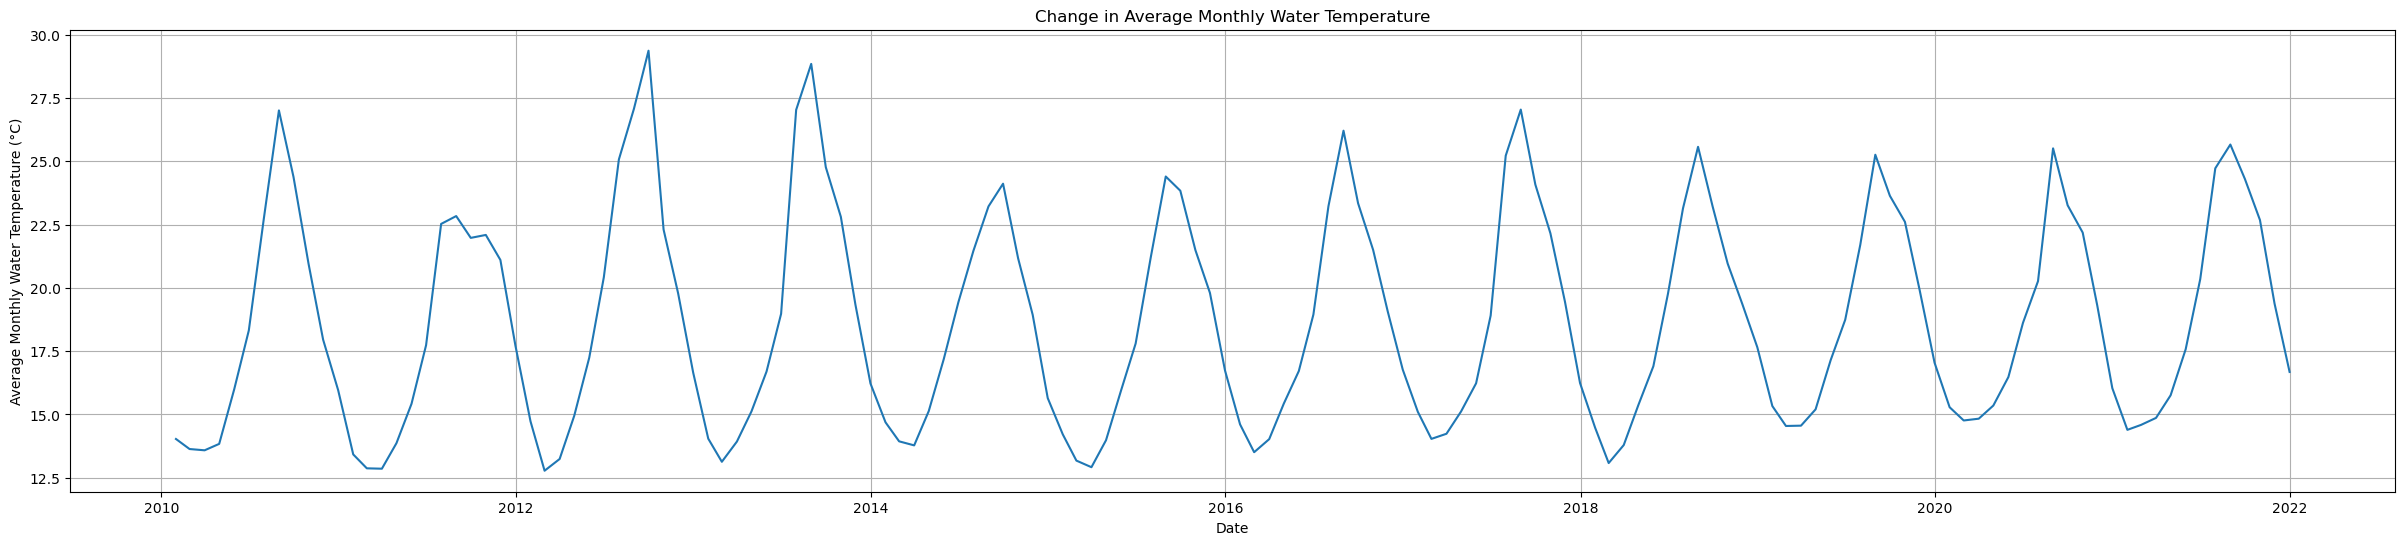

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(monthly_avg_temp)
plt.xlabel('Date')
plt.ylabel('Average Monthly Water Temperature (°C)')
plt.title('Change in Average Monthly Water Temperature')
plt.grid(True)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_11428\3333665684.py:35: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_11428\3333665684.py:35: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


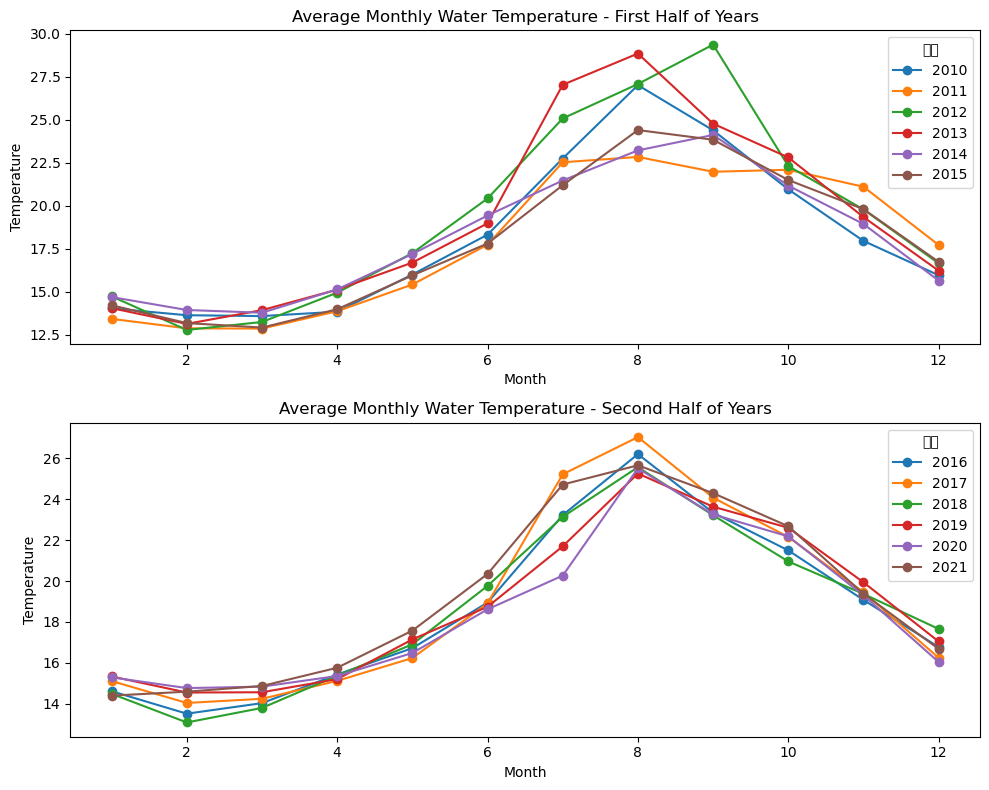

In [33]:
import matplotlib.pyplot as plt

# Group by year and month, and calculate the average temperature
yearly_monthly_avg = df.groupby([df.index.year, df.index.month])['수온'].mean()

# Reshape the data to have years as columns and months as rows
yearly_monthly_avg = yearly_monthly_avg.unstack(level=0)

# Calculate the total number of years
num_years = yearly_monthly_avg.shape[1]

# Calculate the midpoint to divide the years into two groups
midpoint = num_years // 2

# Split the years into two groups
first_half_years = yearly_monthly_avg.iloc[:, :midpoint]
second_half_years = yearly_monthly_avg.iloc[:, midpoint:]

# Create two separate plots for the two groups of years
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first half of the years
first_half_years.plot(marker='o', linestyle='-', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Average Monthly Water Temperature - First Half of Years')

# Plot the second half of the years
second_half_years.plot(marker='o', linestyle='-', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Average Monthly Water Temperature - Second Half of Years')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


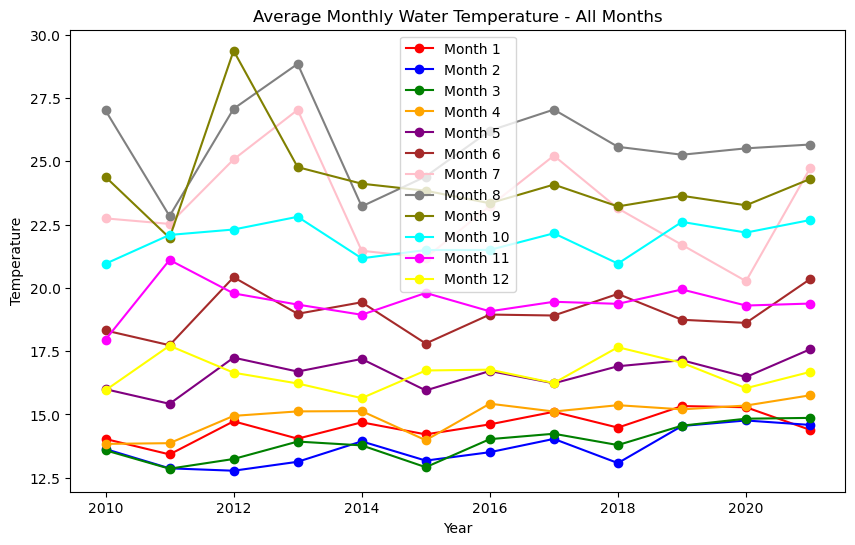

In [34]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['수온'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


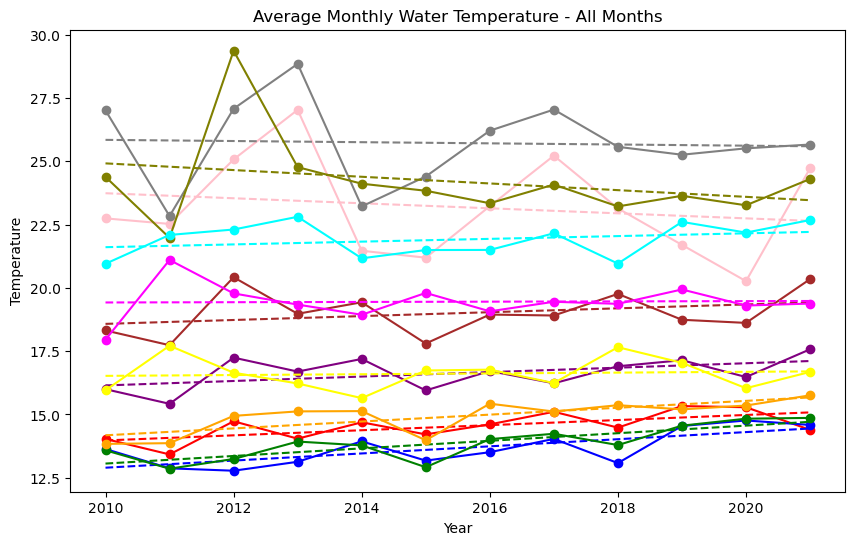

In [35]:

from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['수온'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the linear regression line
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Display the plot
plt.show()


Order of trends by prominence:
1. Month 3 - Slope: 0.14982716745619964
2. Month 2 - Slope: 0.14058016217498978
3. Month 4 - Slope: 0.13594405594405592
4. Month 1 - Slope: 0.10056395217685525
5. Month 5 - Slope: 0.08759981953530326
6. Month 6 - Slope: 0.07674799274799289
7. Month 10 - Slope: 0.054693961952026415
8. Month 12 - Slope: 0.01598466050078958
9. Month 11 - Slope: 0.005319427698737962
10. Month 8 - Slope: -0.022930972253553027
11. Month 7 - Slope: -0.0992121212121211
12. Month 9 - Slope: -0.13212937062937083


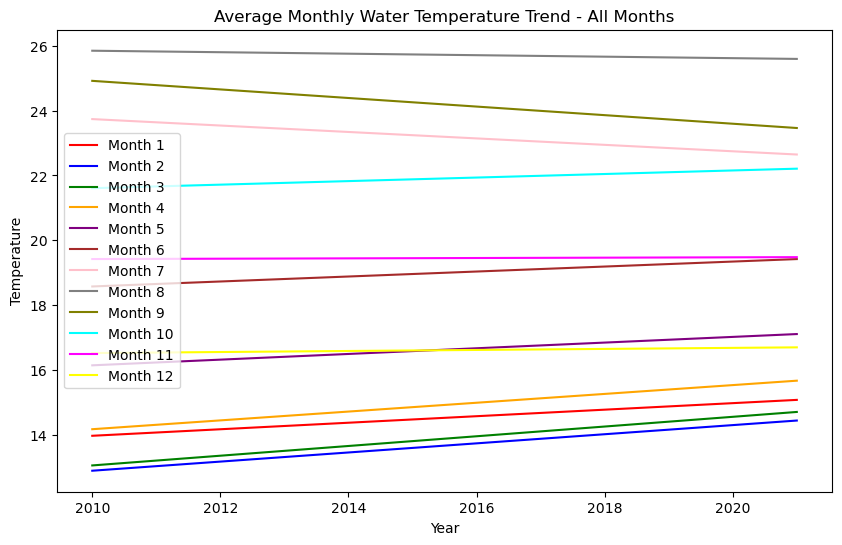

In [36]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store the slopes
slopes = {}

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['수온'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')
    
    # Calculate the slope of the trend line
    slope = reg.coef_[0][0]
    slopes[month] = slope

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (month, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. Month {month} - Slope: {slope}")

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_11428\337688445.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df.index.month.map(month_to_season)


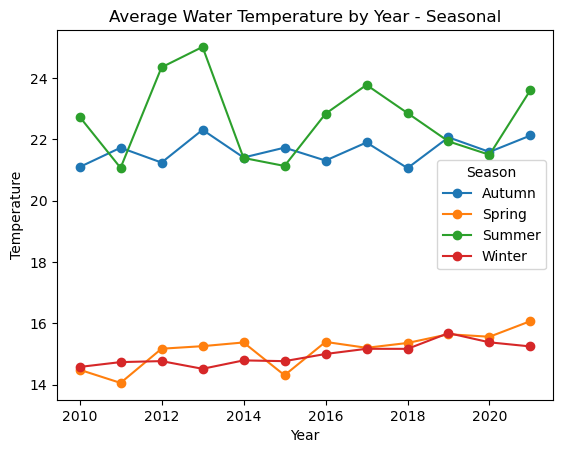

In [37]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['수온'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_11428\1389114275.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df.index.month.map(month_to_season)


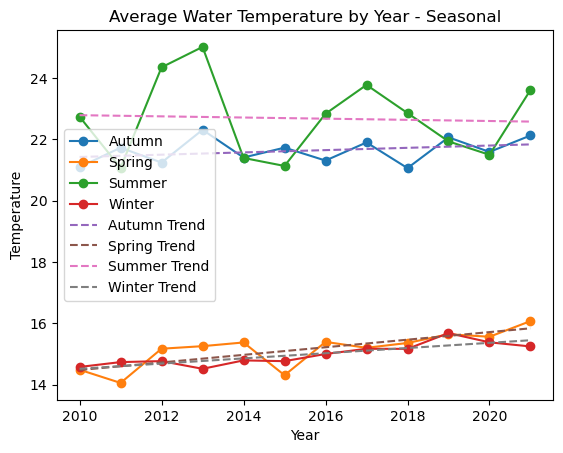

In [38]:

# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['수온'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')

# Add trend lines for each season
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')

plt.legend()
plt.show()


Order of trends by prominence:
1. Spring - Slope: 0.12376764957450558
2. Winter - Slope: 0.08455245196558936
3. Autumn - Slope: 0.03726370833865408
4. Summer - Slope: -0.01894962346106272


C:\Users\admin\AppData\Local\Temp\ipykernel_11428\412306326.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df.index.month.map(month_to_season)


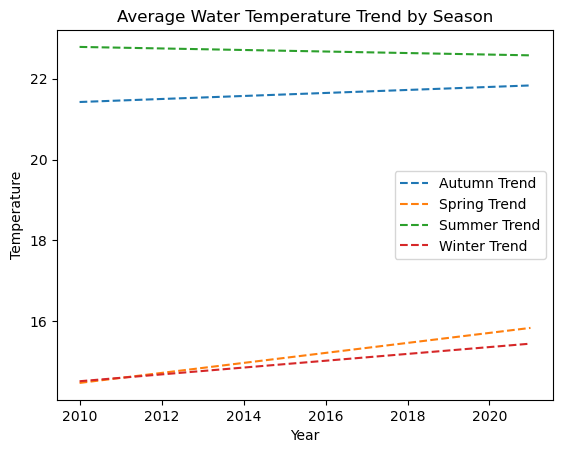

In [39]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['수온'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Initialize a dictionary to store the slopes
slopes = {}

# Plot the trend lines for each season and calculate the slopes
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')
    slopes[season] = model.coef_[0]

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (season, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. {season} - Slope: {slope}")

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature Trend by Season')
plt.legend()
plt.show()


In [40]:
correlation = df['기온'].corr(df['수온'])
print("Correlation between average temperature and average water temperature:", correlation)

Correlation between average temperature and average water temperature: 0.8387059515358712


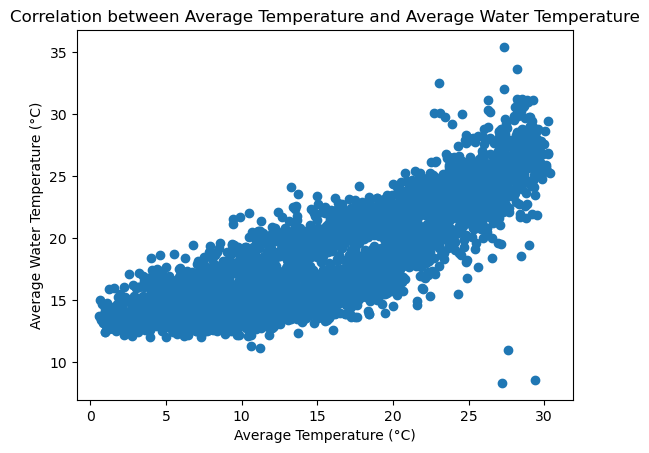

In [41]:
import matplotlib.pyplot as plt

plt.scatter(df['기온'], df['수온'])
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Water Temperature (°C)')
plt.title('Correlation between Average Temperature and Average Water Temperature')
plt.show()

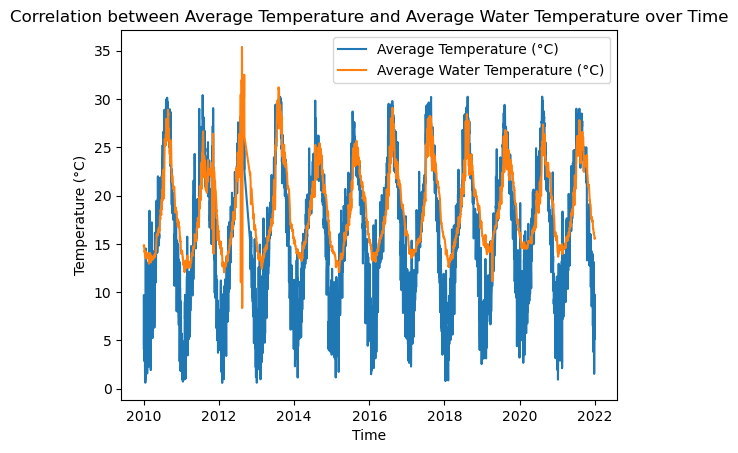

In [42]:
plt.plot(df['기온'], label='Average Temperature (°C)')
plt.plot(df['수온'], label='Average Water Temperature (°C)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Correlation between Average Temperature and Average Water Temperature over Time')
plt.legend()
plt.show()

c:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  f.tight_layout()
c:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  f.tight_layout()
c:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  f.tight_layout()


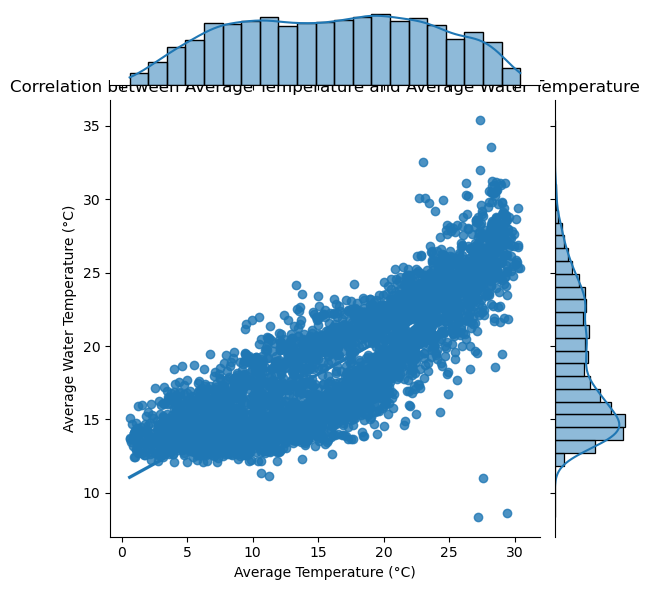

In [43]:
import seaborn as sns

sns.jointplot(x=df['기온'], y=df['수온'], kind='reg')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Water Temperature (°C)')
plt.title('Correlation between Average Temperature and Average Water Temperature')
plt.show()

In [45]:
correlation = df['염분'].corr(df['수온'])
print("Correlation between average temperature and average water temperature:", correlation)

Correlation between average temperature and average water temperature: -0.5406415885656219
